In [ ]:
Ubuntu 系统清理

In [ ]:
1. 查看各分区使用情况
df -hT

In [ ]:
2. home 空间清理
（1）定位大文件和目录（没有用到）
    # 查看用户主目录下各文件夹大小（按从大到小排序）
    cd ~
    du -sh * .[!.]* | sort -hr | head -n 20
（2）更好的办法是使用 ncdu 
    # 安装交互式工具 ncdu
    sudo apt install ncdu
    # 查看空间
    ncdu ~ # ~表示home空间
重点关注 下载/Downloads、文档/Documents、.cache、.local/share/Trash（回收站）等目录。

In [ ]:
3. 清理常见垃圾文件
（1）浏览器缓存
    手动清理浏览器设置中的缓存，或直接删除 ~/.cache 下的浏览器缓存目录（如 ~/.cache/google-chrome）。
（2）系统缓存
    sudo apt clean          # 清理 APT 缓存
    sudo journalctl --vacuum-time=7d  # 删除超过 7 天的系统日志
（3）回收站清理
    rm -rf ~/.local/share/Trash/*  # 清空当前用户的回收站
（4）清理 snap 和 Flatpak
    # 列出所有的 Snap 包
    snap list -all
    # 删除不再需要的 Snap 包及其旧版本
    sudo snap remove --purge <包名>
    # 删除已禁用的 snap 包
    sudo snap remove <名称> --revision <revision ID>
    # 清理 Flatpak 旧版本
    flatpak uninstall --unused

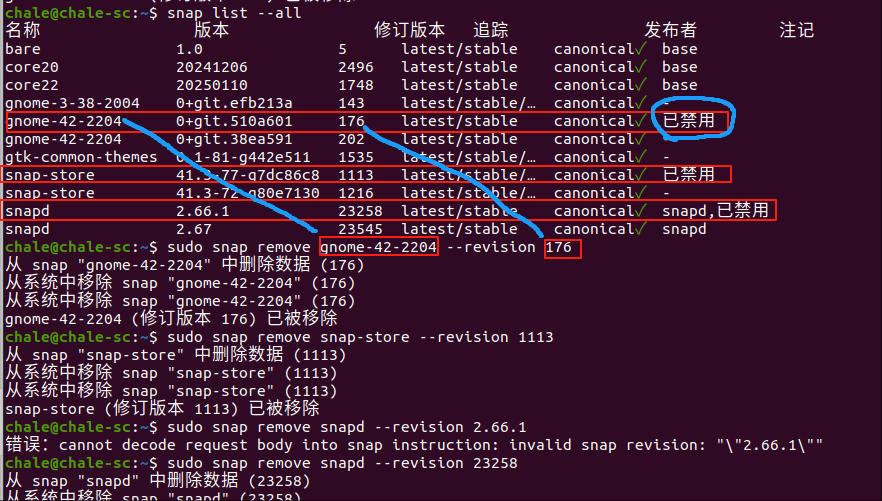

In [1]:
from IPython.display import Image
Image(filename="clean_snap.jpg",width=500,height=500)

In [ ]:
4. 文件移动、清理 && 卸载
（1）迁移数据到其他分区
    首先创建一个新的空间，挂载到home,参考CSDN
    # 示例：将大文件或目录移动到新分区
    mv ~/大型文件夹 /home/chale/NewDisk/
    # 创建符号链接保持访问（可选）
    ln -s /home/chale/NewDisk/大型文件夹 ~/大型文件夹
（2）查找并删除重复文件
    # 安装 fdupes 查找重复文件
    sudo apt install fdupes
    # 扫描指定目录（如 Downloads）
    fdupes -r ~/Downloads
（3）卸载未使用软件
    # 删除不再需要的软件包及配置文件
    sudo apt purge <包名>
    # 清理残留依赖
    sudo apt autoremove --purge

In [ ]:
** 重点清理目标 **

In [ ]:
1. /.cache
这个缓存文件夹基本上是最占 home 空间的
（1）浏览器缓存
    rm -rf ~/.cache/google-chrome/*        # Chrome  
    rm -rf ~/.cache/mozilla/firefox/*      # Firefox 
（2）系统缓存
    sudo apt clean # 清理APT缓存
    rm -rf ~/.cache/thumbnails/*          # 缩略图缓存  
（3）编程工具缓存
    rm -rf ~/.cache/pip/*                 # Python pip 缓存  
    rm -rf ~/.cache/yarn/*                # Yarn 缓存 

In [ ]:
2. 大文件查找
# 如果文件夹不是挂载点，直接删除无用大文件：
cd ~/NewDisk && du -sh * | sort -hr   # 查看内容后选择性删除 

In [ ]:
3. /.local
（1）Flatpak/Snap 应用数据：
    rm -rf ~/.local/share/flatpak/*       # 清理 Flatpak 应用数据  
    rm -rf ~/.local/share/Trash/*         # 清空回收站  
（2）Docker/VMs 镜像（如有）：
    docker system prune                   # 删除 Docker 无用镜像 

In [ ]:
4. ～/.config & ～/.local
不建议清理，宁可扩展 home 分区

In [ ]:
5. 针对性清理
（1）编程/开发文件
./rustup:
    rustup toolchain uninstall nightly    # 删除不需要的 Rust 工具链  
/unitree_ws、/catkin_ws_qm、/.ros：
    清理 ROS 工作空间不用的 build、devel、log 目录：
    cd ~/unitree_ws && rm -rf build devel log  
    /.mujoco：检查是否有多余的 MuJoCo 仿真环境备份文件。
（2）应用数据：
    /.mozilla (392 MiB)：删除 Firefox 的旧版本扩展或离线页面缓存。
    /.thunderbird (14.6 MiB)：清理 Thunderbird 邮件客户端缓存。
    /.xwechat (132 MiB)：删除微信接收的重复文件或过期聊天文件。
    /.zotero (11.8 MiB)：在 Zotero 中清理重复文献附件。
# 删除方法
# 删除 Firefox 缓存（不影响书签和扩展）
    rm -rf ~/.mozilla/firefox/*.default-release/cache/*
    rm -rf ~/.mozilla/firefox/*.default-release/storage/default/*
# 完全删除并重置 Firefox
    # 先关闭所有 Firefox 进程
    killall firefox
    # 删除整个 .mozilla 目录
    rm -rf ~/.mozilla
# 选择性清理
    # 删除旧版本扩展备份
    rm -rf ~/.mozilla/extensions/*
    # 删除崩溃报告和调试日志
    rm -rf ~/.mozilla/firefox/Crash Reports/
    rm -rf ~/.mozilla/firefox/*.default-release/minidumps/